In [1]:
from utilities.gtsrb_loader.get_folderpath import get_folderpath
from keras.models import load_model
from utilities.gtsrb_loader.load_data import load_data
from keras.utils import plot_model

import numpy as np
import os

# from cs231n
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [3]:
path="/data_on_server/Images/GTSRB_64x64/Final_Test"

In [4]:
X_test, y_test = load_data(path)

In [5]:
# normalize X_test
X_test = np.array(X_test, dtype=np.float32) / 255
# one-hot encode the labels
unique_classes = len(np.unique(y_test))
y_test = np.eye(unique_classes)[np.array(y_test, dtype=int)]

In [6]:
model = load_model(os.path.join('models/trained', '16-10-17_convnet_Zero_color_E50.h5'))

plot_model(model, to_file=os.path.join('img', 'model.png'), show_shapes=True)

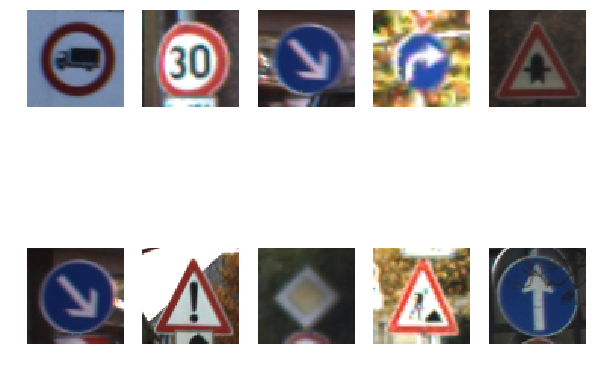

In [7]:
pics = X_test[:10]
for idx, pic in enumerate(pics):
    plt.subplot(2, 5, idx+1)
    plt.axis('off')
    plt.imshow(pic)
plt.show()

In [8]:
predictions = model.predict(pics, verbose=1)
scores = [np.argmax(i) for i in predictions]
scores
# does not work
#[new.get(str(score), score) for score in scores]

10/10 [==============================] - 0s


[16, 1, 38, 33, 11, 38, 18, 12, 25, 35]

In [13]:
image1 = plt.imread(os.path.join('utilities/image_split', '4713small.jpg'), format='jpeg')
image2 = plt.imread(os.path.join('utilities/image_split', '1057small.jpg'), format='jpeg')
image3 = plt.imread(os.path.join(path, 'Images/11477.ppm'), format='ppm')
image4 = plt.imread(os.path.join('utilities/image_split', '4713_cropped.jpg'), format='ppm')
image5 = plt.imread(os.path.join('utilities/image_split', 'PauaKBJ0RScz9iM1dIny_Chrome_logo.jpg'), format='jpg')
image6 = plt.imread(os.path.join('utilities/image_split', 'Chrisl21-Minecraft-Tnt.jpg'), format='jpg')

Read image regions from video

In [14]:
from os import listdir
from os.path import isfile, join

split_path = os.path.join(os.path.realpath('.'),'utilities/image_split')
all_split = [f for f in listdir(split_path) if isfile(join(split_path, f))]
cut_images = []
for f in all_split:
    if f.find('Pic') != -1 and f.find('.jpg') != -1:
        image = plt.imread(os.path.join(split_path,f), format='jpg')
        cut_images.append(image)

Plot them and predictions generated by network

For image 0 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 1 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 2 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 3 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 4 got prediction 13 meaning sign Vorfahrt gewähren with confidence 1.0
For image 5 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 6 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 7 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 8 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 9 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 10 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 11 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 12 got prediction 43 meaning sign Kein Schild with confidence 1.0
For image 13 got

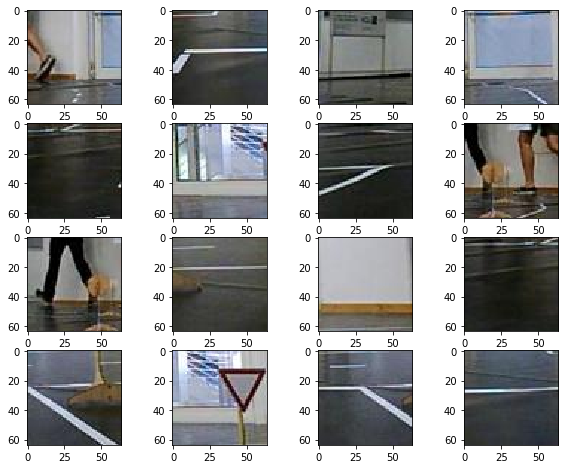

In [15]:
from math import sqrt
import pickle

with open(os.path.join(os.path.realpath('.'), 'dict', 'names_dict.npy'), 'rb') as f:
    names_dict = pickle.Unpickler(f).load();
    
sqrt_size = int(sqrt(len(cut_images)))
predictions = []
for idx,image in enumerate(cut_images):
    plt.subplot(sqrt_size, sqrt_size, idx+1)
    plt.imshow(image)
    predictions.append(model.predict(np.array([image])))
    print("For image", idx, "got prediction",np.argmax(predictions[idx]),"meaning sign",names_dict[str(np.argmax(predictions[idx]))],"with confidence",np.amax(predictions[idx]))
plt.show;

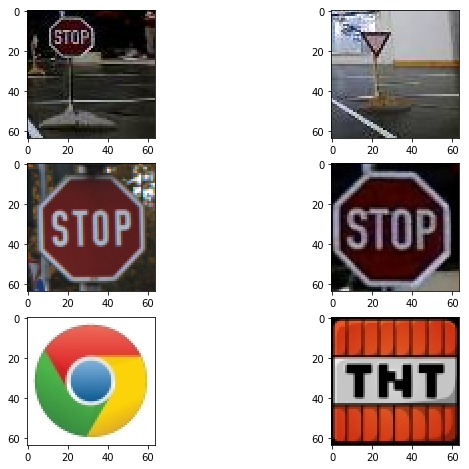

In [16]:
plt.subplot(3, 2, 1)
plt.imshow(image1)
plt.subplot(3, 2, 2)
plt.imshow(image2)
plt.subplot(3, 2, 3)
plt.imshow(image3)
plt.subplot(3, 2, 4)
plt.imshow(image4)
plt.subplot(3, 2, 5)
plt.imshow(image5)
plt.subplot(3, 2, 6)
plt.imshow(image6)
plt.show()

In [19]:
with open(os.path.join(os.path.realpath('.'), 'dict', 'names_dict.npy'), 'rb') as f:
    names_dict = pickle.Unpickler(f).load();

ansF=np.array([np.argmax(pic) for pic in model.predict(np.array([image1, image2, image3, image4, image5, image6]))])
valF=model.predict(np.array([image1, image2, image3, image4, image5, image6]))
for idx,im in enumerate(ansF):
    print("For image", idx, "got prediction",ansF[idx],"meaning sign",names_dict[str(ansF[idx])],"with",valF[idx].max())


For image 0 got prediction 43 meaning sign Kein Schild with 1.0
For image 1 got prediction 43 meaning sign Kein Schild with 1.0
For image 2 got prediction 14 meaning sign STOP with 1.0
For image 3 got prediction 14 meaning sign STOP with 1.0
For image 4 got prediction 5 meaning sign Geschwindigkeitsbegrenzung 80 with 1.0
For image 5 got prediction 43 meaning sign Kein Schild with 1.0


In [ ]:
#test
testmax=10000
pred=np.array([np.argmax(pic) for pic in model.predict(np.array(X_test[0:testmax]))])
ans=np.array([np.argmax(pic) for pic in np.array(y_test[0:testmax])])
val=model.predict(np.array(X_test[0:testmax]))
diff=pred-ans
Error=(np.count_nonzero(diff)/testmax)*100
print("The Error is",Error,"%")
val.max(axis=1).min()

In [ ]:
val.max(axis=1).argmin()

In [ ]:
show=806
v=np.where(diff !=0)[0]
sizeD = int(len(diff)/4)+1
for idx,show in enumerate(list(v)):
    plt.subplot(7,4, idx+1)
    plt.imshow(X_test[show])
    print("Element",show,"Predicts",pred[show],names_dict[str(pred[show])],"Answer",ans[show],names_dict[str(ans[show])],"Probability",val[show].max())
plt.show()

In [ ]:
np.where(diff !=0)[0]

In [ ]:
v.size()

In [ ]:
int(len(v)/4)+1


In [ ]:
np.array(image)

In [ ]:
plt.imshow(cut_images[15])

In [ ]:
valF